# Linear regression and Regularization


### Importing and configuration

In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
# pandas configs
main_df = pd.read_csv("football.csv")
pd.set_option("display.max_columns", None)

### Preprocessing

In [155]:
main_df.shape

(7772, 66)

In [156]:
main_df.head(5)

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,30.0,10.0,Left,4,4,5,Medium/Low,Unique,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,9.0,9.0,Right,4,4,5,High/Medium,Unique,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,7.0,7.0,Right,4,5,5,High/Low,Unique,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,10.0,NaN,Right,5,5,5,High/Medium,Unique,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,17.0,7.0,Right,5,4,4,High/High,Unique,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,1


In [157]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    7772 non-null   int64  
 1   short_name                   7772 non-null   object 
 2   overall                      7772 non-null   int64  
 3   potential                    7772 non-null   int64  
 4   value_eur                    7706 non-null   float64
 5   wage_eur                     7711 non-null   float64
 6   age                          7772 non-null   int64  
 7   height_cm                    7772 non-null   int64  
 8   weight_kg                    7772 non-null   int64  
 9   club_team_id                 7711 non-null   float64
 10  club_name                    7711 non-null   object 
 11  league_name                  7711 non-null   object 
 12  league_level                 7711 non-null   float64
 13  club_jersey_number

In [158]:
print("catagorical columns:")
display(main_df.select_dtypes(include=["object"]).columns.to_list())
print("Numerical  columns:")
main_df.select_dtypes(include='number').columns.to_list()

catagorical columns:


['short_name',
 'club_name',
 'league_name',
 'preferred_foot',
 'work_rate',
 'body_type',
 'player_tags',
 'player_traits']

Numerical  columns:


['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'nation_jersey_number',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'de

In [159]:
def missing(main_df):
    missing_percentage = (main_df.isnull().sum() / len(main_df)) * 100
    missing_rows_per_column = main_df.isnull().sum()
    missing_df = pd.DataFrame({'Column_Name': main_df.columns,'Missing_Rows': missing_rows_per_column.values, 'Missing_Percentage': missing_percentage})
    missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)
    pd.set_option('display.max_rows', None)
    columns_with_missing = missing_df[missing_df['Missing_Percentage'] > 0]
    display(columns_with_missing)
missing(main_df)

,Column_Name,Missing_Rows,Missing_Percentage
nation_jersey_number,nation_jersey_number,7239,93.142048
goalkeeping_speed,goalkeeping_speed,7063,90.877509
player_tags,player_tags,6900,88.780237
player_traits,player_traits,2901,37.326300
physic,physic,709,9.122491
dribbling,dribbling,709,9.122491
passing,passing,709,9.122491
shooting,shooting,709,9.122491
pace,pace,709,9.122491
defending,defending,709,9.122491


### Feature Selection

In [160]:
req_col = ['overall',
 'potential',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
]
main_df = main_df[req_col]
missing(main_df)

,Column_Name,Missing_Rows,Missing_Percentage
pace,pace,709,9.122491
shooting,shooting,709,9.122491
passing,passing,709,9.122491
dribbling,dribbling,709,9.122491
defending,defending,709,9.122491
physic,physic,709,9.122491


In [161]:
display(main_df[['dribbling','pace','physic','defending','passing','shooting']].describe())

,dribbling,pace,physic,defending,passing,shooting
count,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000
mean,64.637689,68.607107,68.312473,55.528529,60.148096,54.401954
std,9.363637,11.701207,8.515295,15.643798,9.579853,14.351594
min,29.000000,28.000000,31.000000,16.000000,25.000000,18.000000
25%,59.000000,62.000000,63.000000,42.500000,54.000000,44.000000
50%,65.000000,70.000000,69.000000,61.000000,61.000000,57.000000
75%,71.000000,77.000000,74.000000,67.000000,67.000000,65.000000
max,95.000000,97.000000,90.000000,91.000000,93.000000,94.000000


In [162]:
cols = ['dribbling','pace','physic','passing','shooting']
main_df[cols]=main_df[cols].fillna(main_df.mode().iloc[0])
main_df.dropna(inplace=True)
missing(main_df)

,Column_Name,Missing_Rows,Missing_Percentage


In [163]:
main_df.shape

(7063, 45)

### Calculating correlation coefficient

In [164]:
threshold = 0.9  #
Y = main_df['overall']
# find pairs with high correlation and removing them
corr = main_df.corr()
highly_correlated_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= threshold:
            pair = (corr.columns[i], corr.columns[j])
            highly_correlated_pairs.append(pair)
print(highly_correlated_pairs)
for var1, var2 in highly_correlated_pairs:
    if var2 in main_df:
        main_df.drop(columns=[var2],inplace=True)


[('attacking_finishing', 'shooting'), ('skill_dribbling', 'dribbling'), ('skill_ball_control', 'dribbling'), ('movement_acceleration', 'pace'), ('movement_sprint_speed', 'pace'), ('power_long_shots', 'shooting'), ('mentality_interceptions', 'defending'), ('defending_marking_awareness', 'defending'), ('defending_marking_awareness', 'mentality_interceptions'), ('defending_standing_tackle', 'defending'), ('defending_standing_tackle', 'mentality_interceptions'), ('defending_standing_tackle', 'defending_marking_awareness'), ('defending_sliding_tackle', 'defending'), ('defending_sliding_tackle', 'mentality_interceptions'), ('defending_sliding_tackle', 'defending_marking_awareness'), ('defending_sliding_tackle', 'defending_standing_tackle')]


In [165]:
X = main_df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [166]:
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")

In [167]:

l = LinearRegression()
l.fit(X_train, y_train)
y_pred = l.predict(X_test)
print("Real Values: ", y_test.to_list()[:10])
print("Predicted Values: ", y_pred[:10])

Real Values:  [69, 74, 77, 69, 76, 74, 77, 61, 72, 72]
Predicted Values:  [69. 74. 77. 69. 76. 74. 77. 61. 72. 72.]


### Linear Model evaluation

In [168]:
metrics(y_test, y_pred)

Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R2 Score: 1.0000


# Regularization

### Ridge and Lasso Regression

In [169]:
from sklearn.linear_model import Ridge,Lasso
ridge_results = []
lasso_results = []

alphas = [0.001,0.1,1.0,10.0,100.0]

for alpha in alphas:
    # ridge 
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_predictions = ridge_model.predict(X_test)

    ridge_mse = mean_squared_error(y_test, ridge_predictions)
    ridge_r2 = r2_score(y_test, ridge_predictions)
    ridge_results.append((alpha, ridge_mse, ridge_r2))
    
    # Lasso 
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_predictions = lasso_model.predict(X_test)
    
    lasso_mse = mean_squared_error(y_test, lasso_predictions)
    lasso_r2 = r2_score(y_test, lasso_predictions)
    lasso_results.append((alpha, lasso_mse, lasso_r2))

### Ridge and Lasso model evaluation

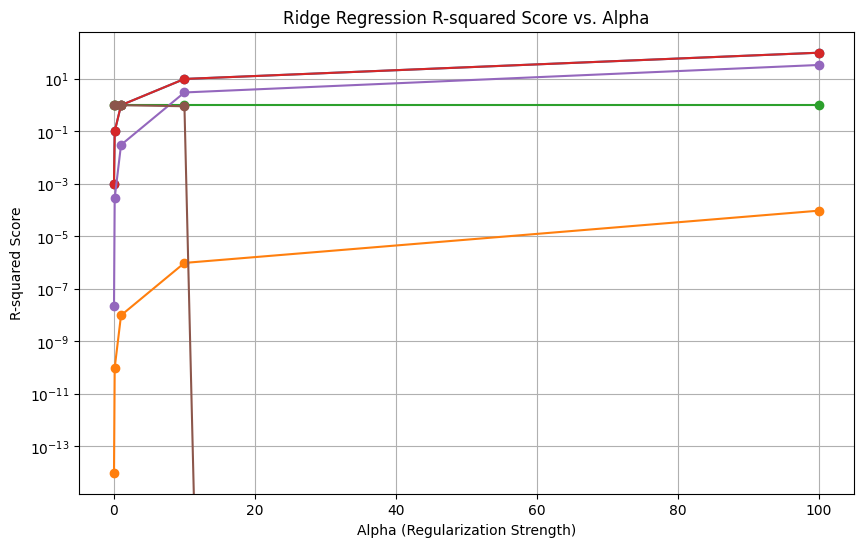

In [172]:
plt.figure(figsize=(10, 6))
plt.semilogy(alphas, ridge_results, marker='o', linestyle='-')
plt.semilogy(alphas, lasso_results, marker='o', linestyle='-')
plt.title('Ridge Regression R-squared Score vs. Alpha')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()

In [171]:
print("Linear Regression: ")
y_pred = l.predict(X_test)
metrics(y_test, y_pred)

print("\n\nRidge Regression: ")
y_pred = ridge_cv.predict(X_test)
metrics(y_test, y_pred)

print("\n\nLasso Regression: ")
y_pred = lasso_cv.predict(X_test)
metrics(y_test, y_pred)

Linear Regression: 
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
R2 Score: 1.0000


Ridge Regression: 
Mean Absolute Error (MAE): 0.0008
Mean Squared Error (MSE): 0.0000
R2 Score: 1.0000


Lasso Regression: 
Mean Absolute Error (MAE): 1.3872
Mean Squared Error (MSE): 3.0560
R2 Score: 0.9103
